In [25]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [26]:
tenda_df = pd.read_csv('tenda_propostas_DF.csv',sep=';',decimal = ',')

In [27]:
tenda_df.dtypes

Chave unica                       object
Preco Venda                        int64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [28]:
tenda_df.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO250830G3H8L5353269,228000,8300.0,0.0
1,PRO17071400058353683,195000,5370.6,5490.6
2,PRO241725Q4L2B9353931,195000,4811.6,0.0
3,PRO17111102050359521,195050,2800.0,0.0
4,PRO18041225954336547,215000,3846.0,28436.8


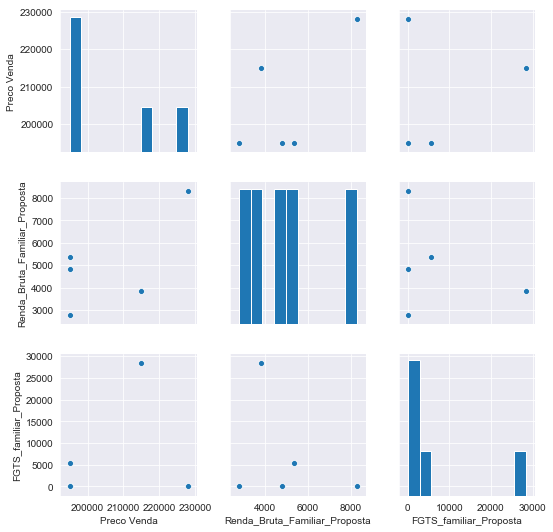

In [29]:
sb.pairplot(tenda_df)

In [30]:
tenda_drop_df = tenda_df.drop(['Chave unica'],axis = 1)
tenda_drop_df

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,228000,8300.0,0.0
1,195000,5370.6,5490.6
2,195000,4811.6,0.0
3,195050,2800.0,0.0
4,215000,3846.0,28436.8


K_MEANS (RS)

In [31]:
from sklearn.cluster import KMeans

In [32]:
sb.set_style('darkgrid')

In [33]:
wcss = []

In [34]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_df)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

1 1551957856.3200002
2 522499980.66666675
3 23755125.546666674
4 2024517.2800000007
5 0.0


ValueError: n_samples=5 should be >= n_clusters=6

In [35]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [36]:
kmeans.fit(tenda_drop_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [37]:
kmeans.labels_

array([2, 1, 1, 1, 0])

CLASSES CRIADAS 

In [38]:
tenda_df['Kclasses'] = kmeans.labels_

In [39]:
tenda_df. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO250830G3H8L5353269,228000,8300.0,0.0,2
1,PRO17071400058353683,195000,5370.6,5490.6,1
2,PRO241725Q4L2B9353931,195000,4811.6,0.0,1
3,PRO17111102050359521,195050,2800.0,0.0,1
4,PRO18041225954336547,215000,3846.0,28436.8,0


In [40]:
tenda_df['Kclasses'] = kmeans.labels_

In [41]:
tenda_df.Kclasses.value_counts()

1    3
2    1
0    1
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [42]:
tenda_df.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,5.00,5.00,5.00,5.00
mean,205610.00,5025.64,6785.48,1.00
std,15216.29,2075.53,12334.75,0.71
min,195000.00,2800.00,0.00,0.00
25%,195000.00,3846.00,0.00,1.00
50%,195050.00,4811.60,0.00,1.00
75%,215000.00,5370.60,5490.60,1.00
max,228000.00,8300.00,28436.80,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

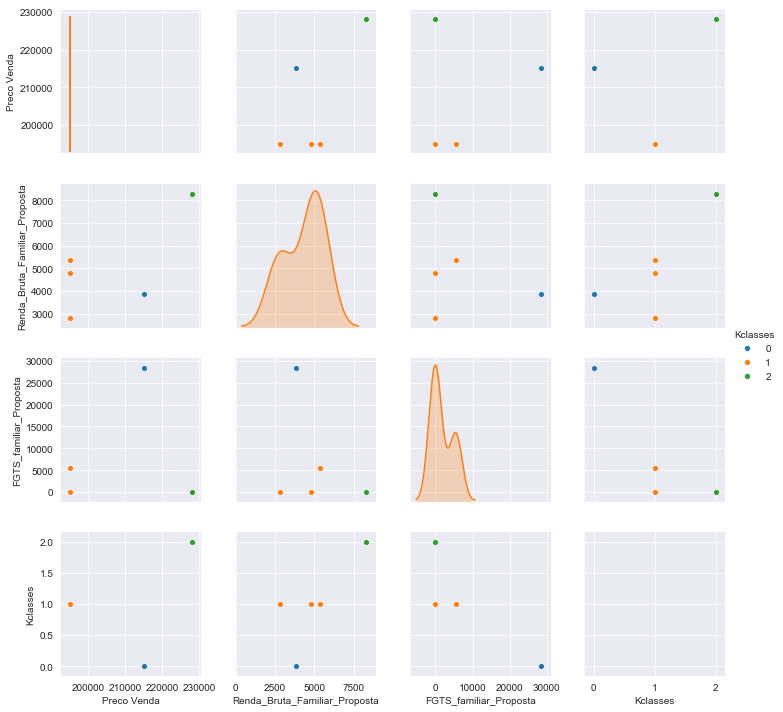

In [43]:
sb.pairplot(tenda_df,hue='Kclasses')

EXPORTANDO DADOS

In [44]:
tenda_df.to_csv('clustertenda_DF.csv',sep=';',decimal=',')